# Understanding the Inverse Seesaw in a gauged non-universal U(1)_X model

In this notebook we follow the implementation of the ISS in the work [A gauged non-universal U(1)_X model to study g-2 and B meson anomalies](https://arxiv.org/abs/2105.04715)

In [3]:
from sympy import MatrixSymbol, BlockMatrix, init_printing, ZeroMatrix, symbols, Identity, block_collapse
from sympy import DiagonalMatrix, conjugate, factor, expand
from sympy.physics.quantum import Dagger
init_printing()

If $m_D^\prime = 0$ and $m_D = \xi M_D$

In [4]:
n = 3
mD = MatrixSymbol('m_D', n,n)
MD = MatrixSymbol('M', n,n)
#MD = DiagonalMatrix(MD)
mu = MatrixSymbol(r'mu', n,n)
#mu = DiagonalMatrix(mu)
Z1 = ZeroMatrix(n,n)
In = Identity(n)
epsilon = symbols(r'\epsilon', positive=True)


# Seesaw

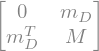

In [5]:

MSS = BlockMatrix(
    [
        [Z1, mD],
        [mD.T, MD]
    ]
)
MSS

In [6]:
from sympy import exp

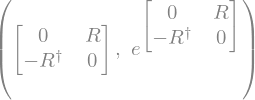

In [7]:
R = MatrixSymbol('R', 3 , 3)
X = BlockMatrix(
    [
        [Z1, R],
        [-Dagger(R), Z1]
    ]
)
Omega = exp(X)
X,Omega

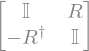

In [8]:
I6 = BlockMatrix(
    [
        [In, Z1],
        [Z1, In]
    ]
)
#Omega_approx = block_collapse(I6 + X + X**2/2)
Omega_approx = block_collapse(I6 + X)
Omega_approx

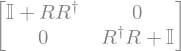

In [9]:
Omega_approxDaggerOmega_approx = block_collapse(Dagger(Omega_approx)*Omega_approx)
Omega_approxDaggerOmega_approx

In [10]:
block_collapse(Omega_approxDaggerOmega_approx.blocks[0,1]).expand()

In [11]:
block_collapse(Omega_approxDaggerOmega_approx.blocks[1,0]).expand()

In [12]:
block_collapse(Omega_approxDaggerOmega_approx.blocks[0,0].expand())

In [13]:
block_collapse(Omega_approxDaggerOmega_approx.blocks[1, 1].expand())

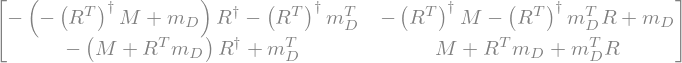

In [14]:
OmegaTMSSOmega = block_collapse(Omega_approx.T*MSS*Omega_approx)
OmegaTMSSOmega

In [15]:
block_collapse(OmegaTMSSOmega.blocks[0,1].expand())


In [16]:
from sympy import Sum, Add, MatAdd, Basic

def count_symbol_occurrences_in_terms(expr, target_symbol):
    """
    Counts the number of times a target symbol appears within each
    additive term of a SymPy expression.

    Args:
        expr: The SymPy expression (e.g., Add, MatAdd, or a single term).
        target_symbol: The SymPy symbol (e.g., MatrixSymbol) to count within
                    each term.

    Returns:
        list: A list of integers. Each integer represents the number of times
            target_symbol occurs in the corresponding additive term of expr.
            The order matches the order of terms in expr.args if expr is
            an Add/MatAdd. If expr is not an addition, it returns a list
            with a single count for the entire expression.

    Raises:
        TypeError: If expr or target_symbol are not SymPy Basic objects.
    """
    # Input validation
    if not isinstance(expr, Basic):
        raise TypeError(f"Expected a SymPy Basic object for expr, but got {type(expr)}")
    if not isinstance(target_symbol, Basic):
        raise TypeError(f"Expected a SymPy Basic object for target_symbol, but got {type(target_symbol)}")

    # Identify the additive terms
    # Terms are arguments of Add or MatAdd at the top level.
    if isinstance(expr, (Add, MatAdd)):
        terms = expr.args
    else:
        # If the expression is not an addition (e.g., just R, R*R, I),
        # treat the entire expression as a single term.
        terms = [expr]

    # Count occurrences within each term
    occurrence_counts = {}
    #print(f"--- Analyzing Expression: {expr} ---")
    #print(f"Target Symbol: {target_symbol}")
    #print(f"Identified Terms: {terms}")

    for i, term in enumerate(terms):
        # Use the .count() method to find occurrences within the term's tree
        count = term.count(target_symbol)
        #print(f"  Term {i+1}: {term} -> Occurrences of {target_symbol}: {count}")
        occurrence_counts[term] = count

    #print(f"Resulting counts per term: {occurrence_counts}")
    #print("-"*(25+len(str(expr))))
    return occurrence_counts

In [17]:
def approximate_block(block, order=2):
    dict_ocurrences = count_symbol_occurrences_in_terms(
        block_collapse(block.expand()), R
    )
    term_approx = Z1
    for term, count in dict_ocurrences.items():
        if count<order:
            term_approx += term
    
    return term_approx

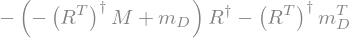

In [18]:
OmegaTMSSOmega_block_approx = []
for block in OmegaTMSSOmega.blocks:
    block_approx = approximate_block(block)
    display(block)
    display(block_approx)
    OmegaTMSSOmega_block_approx.append(block_approx)


In [19]:
block_collapse(OmegaTMSSOmega_block_approx[0].subs(
    conjugate(R), mD*MD.inv()
).subs(
    Dagger(R), MD.inv()*mD.T
))

In [20]:
block_collapse(OmegaTMSSOmega_block_approx[1].subs(
    conjugate(R), mD*MD.inv()
)
)

In [21]:
block_collapse(OmegaTMSSOmega_block_approx[2].subs(
    Dagger(R), MD.inv()*mD.T
)
)

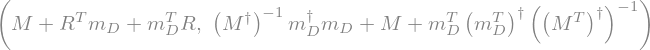

In [22]:
OmegaTMSSOmega_block_approx[3], block_collapse(OmegaTMSSOmega_block_approx[3].subs(
    R, conjugate(mD*MD.inv())
).subs(
    Dagger(R), MD.inv()*mD.T
))

# Inverse Seesaw

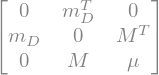

In [23]:
MISS = BlockMatrix(
    [
        [Z1, mD.T, Z1],
        [mD, Z1, MD.T],
        [Z1, MD, mu]
    ]
)
MISS

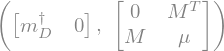

In [24]:
B = BlockMatrix(
    [
        [Dagger(mD), Z1]
    ]
)
C = BlockMatrix(
    [
        [Z1, MD.T],
        [MD, mu]
    ]
)
B, C


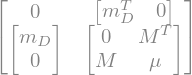

In [25]:
MISS_BC = BlockMatrix(
    [
        [Z1, block_collapse(conjugate(B))],
        [block_collapse(conjugate(B).T), C]
    ]
)
MISS_BC

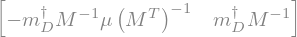

In [26]:
Theta_nu = block_collapse(B*conjugate(block_collapse(conjugate(C.inv()))))
Theta_nu

In [27]:
Theta_nu.shape

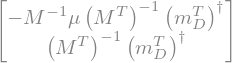

In [28]:
Theta_nu_dagger = block_collapse(C.inv()*B.T)
Theta_nu_dagger

In [29]:
Theta_nu_dagger.shape

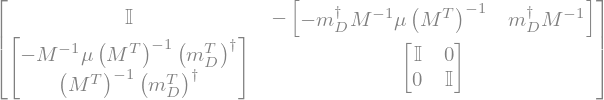

In [30]:
VSS = BlockMatrix(
    [
        [In, -block_collapse(Theta_nu)],
        [Theta_nu_dagger, I6]
    ]
)
VSS

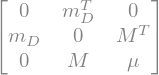

In [31]:
block_collapse(MISS_BC)

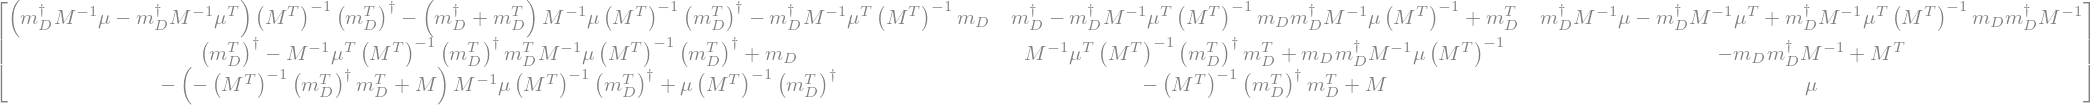

In [32]:
VSSTMISSVSS = block_collapse(VSS.T*MISS*VSS)
VSSTMISSVSS

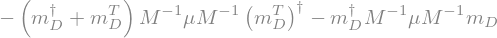

In [33]:
block_collapse(VSSTMISSVSS.blocks[0,0].subs(MD.T, MD).subs(mu.T, mu))

In [34]:
block_collapse(VSSTMISSVSS.blocks[0,1].subs(MD.T, MD).subs(mu.T, mu).subs(Dagger(mD), mD))

In [35]:
block_collapse(VSSTMISSVSS.blocks[0,2].subs(MD.T, MD).subs(mu.T, mu).subs(Dagger(mD), mD))

## Particular cases

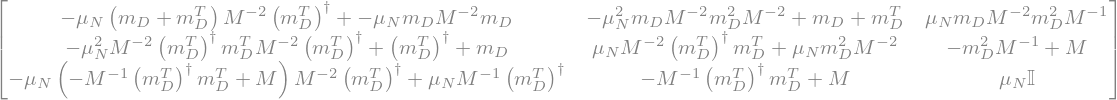

In [36]:
MR, muN = symbols(r'M_R, \mu_N', positive=True)
VSSTMISSVSS_1 = block_collapse(VSSTMISSVSS.subs(MD.T, MD).subs(mu.T, mu).subs(
    Dagger(mD), mD
).subs(mu, muN*In))#.subs(mD, DiagonalMatrix(mD))
VSSTMISSVSS_1

In [37]:
mnu_def = block_collapse((-B*C.inv()*B.T).subs(MD.T, MD).subs(Dagger(mD), mD))
mnu_def

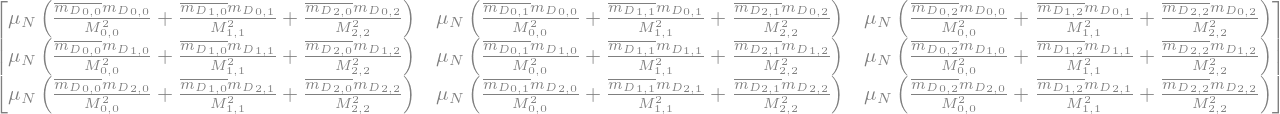

In [38]:
(mnu_def.subs(mu, muN*In).subs(MD, DiagonalMatrix(MD))).as_explicit()

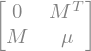

In [39]:
C

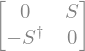

In [41]:
S = MatrixSymbol('S', 3, 3)
Y = BlockMatrix(
    [
        [Z1, S],
        [-Dagger(S), Z1]
    ]
)
Y

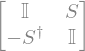

In [44]:
Uapr = block_collapse(I6 + Y)
Uapr

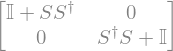

In [50]:
block_collapse(Dagger(Uapr)*Uapr)

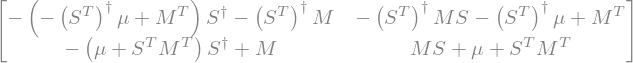

In [46]:
UTCU = block_collapse(Uapr.T*C*Uapr)
UTCU

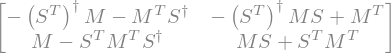

In [47]:
UTCU_dirac = block_collapse(Uapr.T*C.subs(mu, Z1)*Uapr)
UTCU_dirac

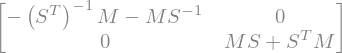

In [53]:
block_collapse(UTCU_dirac.subs(MD.T, MD).subs(conjugate(S)*MD, MD*S.inv()).subs(MD*Dagger(S), (S.T).inv()*MD))

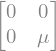

In [54]:
MU = BlockMatrix(
    [
        [Z1, Z1],
        [Z1, mu]
    ]
)
MU

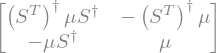

In [55]:
UTMUU = block_collapse(Uapr.T*MU*Uapr)
UTMUU

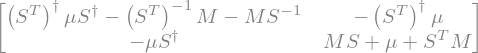

In [57]:
block_collapse((UTCU_dirac + UTMUU).subs(MD.T, MD).subs(conjugate(S)*MD, MD*S.inv()).subs(MD*Dagger(S), (S.T).inv()*MD))

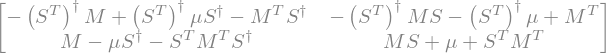

In [58]:
block_collapse(
    (UTCU_dirac + UTMUU)
    )

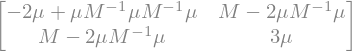

In [63]:
block_collapse(
    (UTCU_dirac + UTMUU).subs(MD.T,MD).subs(
        {
            Dagger(S):MD.inv()*mu,
            S:MD.inv()*mu,
            conjugate(S):mu*MD.inv(),
            S.T:mu*MD.inv()
        }
    )
)